# Regressione

![](https://upload.wikimedia.org/wikipedia/commons/b/be/Normdist_regression.png)


La **Regressione** è un processo attraverso il quale miriamo a stimare la relazione tra una o più variabili di input e una variabile di output.

Nella regressione si assume che la variabile di output sia dipendente dalle variabili di input. L'obiettivo è quello di capire quale sia la loro dipendenza.

Per questo motivo, le variabili di input vengono spesso definite come variabili indipendenti (o *predictors*), mentre le variabili di output come variabili dipendenti

> L'analisi della regressione ci aiuta a capire come il valore di output varia al variare delle variabili di input


## Tipi di variabili
Esistono diversi tipi di variabili statistiche. Tuttavia, esse possono essere raggruppate in due categorie:

- ***quantitative***: variabili espresse numericamente.
  - *continue*: Prendono un valore infinito di valori tra un intervallo di dati(es. tempo impiegato per correre 100m).
  - *discreta*: Prendono un valore finito di valori tra un intervallo di dati (es. numero di libri venduti).
- ***qualitativa***: variabili espresse tramite categorie
  - *ordinali*: variabili in cui le categorie seguono un ordine (es. XS, S, M, L, XL)
  - *nominali*: variabili in cui le categorie non seguono un ordine specifico (es. rosso, blu, giallo).

Nella regressione la variabile di output è sempre una variabile numerica continua!

> Nella regressione esistono potenzialmente un numero infinito di possibili output. Ciò è in contrasto con la classificazione, in cui il numero di classi di output è fisso.




# Esercizio 1: Regressione Lineare

In statistica, la regressione lineare è una tecnica utilizzata per modellare la relazione tra una variabile numerica continua $y$ e una o più variabili esplicative $\{x_1, x_2, \ldots, x_n\}$.

Nel caso in cui la variabile esplicativa sia solamente una, la regressione viene definita *semplice*, altrimenti si parla di regressione *multipla*

Nella regressione lineare assumiamo che la relazione tra la variabile di output e le variabili di input sia di tipo **lineare**.

$$
y = \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n +\alpha
$$


Ref: https://en.wikipedia.org/wiki/Linear_regression


## Dataset
<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/9/96/ISH_WC_Boston4.jpg" style="width:100%">
  <figcaption>Image from https://en.wikipedia.org/wiki/Boston</figcaption>
</figure>

Per questo esercizio utilizzeremo il "Boston Housing" dataset. Questo dataset contiene informazioni sul valore delle case nella perifieria di Boston.



   (a) Origin: il dataset è preso dalla StatLib library mantenuta alla Carnegie Mellon University.
   
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
   
   (c) Date: July 7, 1993
   
</br>

#### *Acquisire il dataset*

---

Per prima cosa dobbiamo acquisire il nostro dataset. Questo dataset era messo a disposizione all'interno della libreria sklearn ed era accessibile tramite il metodo `sklearn.datasets.load_boston`, ma è stato tolto nell'ultimo aggiornamento di Sklean

In [13]:
import pandas as pd

In [14]:
boston= pd.read_csv(r"C:\Users\ElvisThierrySounnaVo\Documents\Python Scripts\boston.csv")

In [15]:
boston.shape

(507, 14)

#### *Esplorare il dataset*

---
Come in ogni analisi, procediamo poi ad esplorare il dataset per capire il tipo di dati con cui abbiamo a che fare.

In [16]:
# Visualizziamo il dataset. Cosa notiamo?
boston[:1]

,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [17]:
# Definiamo nel modo giusto inomidelle colonne
df_boston= pd.read_csv("boston.csv", header=1)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

#### *Preparare i dataset*

---
Uno step molto importante in tutte le analisi di dati, è la preparazione del dataset. In questo caso andremo ad organizzare i nostri dati in un `DataFrame`di pandas.

In [18]:
#creiamo il dataset "target" con la colonna "MEDV"
boston.target= df_boston["MEDV"]
boston.target.head()

C:\Users\ElvisThierrySounnaVo\AppData\Local\Temp\ipykernel_35540\1712069589.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  boston.target= df_boston["MEDV"]


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [19]:
# Creiamo una nuova colonna PRICE con il prezzo di riferimento
df_boston = df_boston.rename(columns={'MEDV': 'PRICE'})
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Organizzare i dati in forma tabulare in un DataFrame di pandas ci permette di poter analizzare e manipolare rapidamente le varie features singolarmente o a gruppi. Ad esempio tramite il metodo `describe`possiamo avere in un unica interfaccia diverse informazioni sulle varie features presenti nel nostro dataset.

In [20]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Possiamo poi visualizzare le relazioni che intercorrono tra le varie input features e la variabile di output. Per fare ciò possiamo utilizzare degli scatter plot.

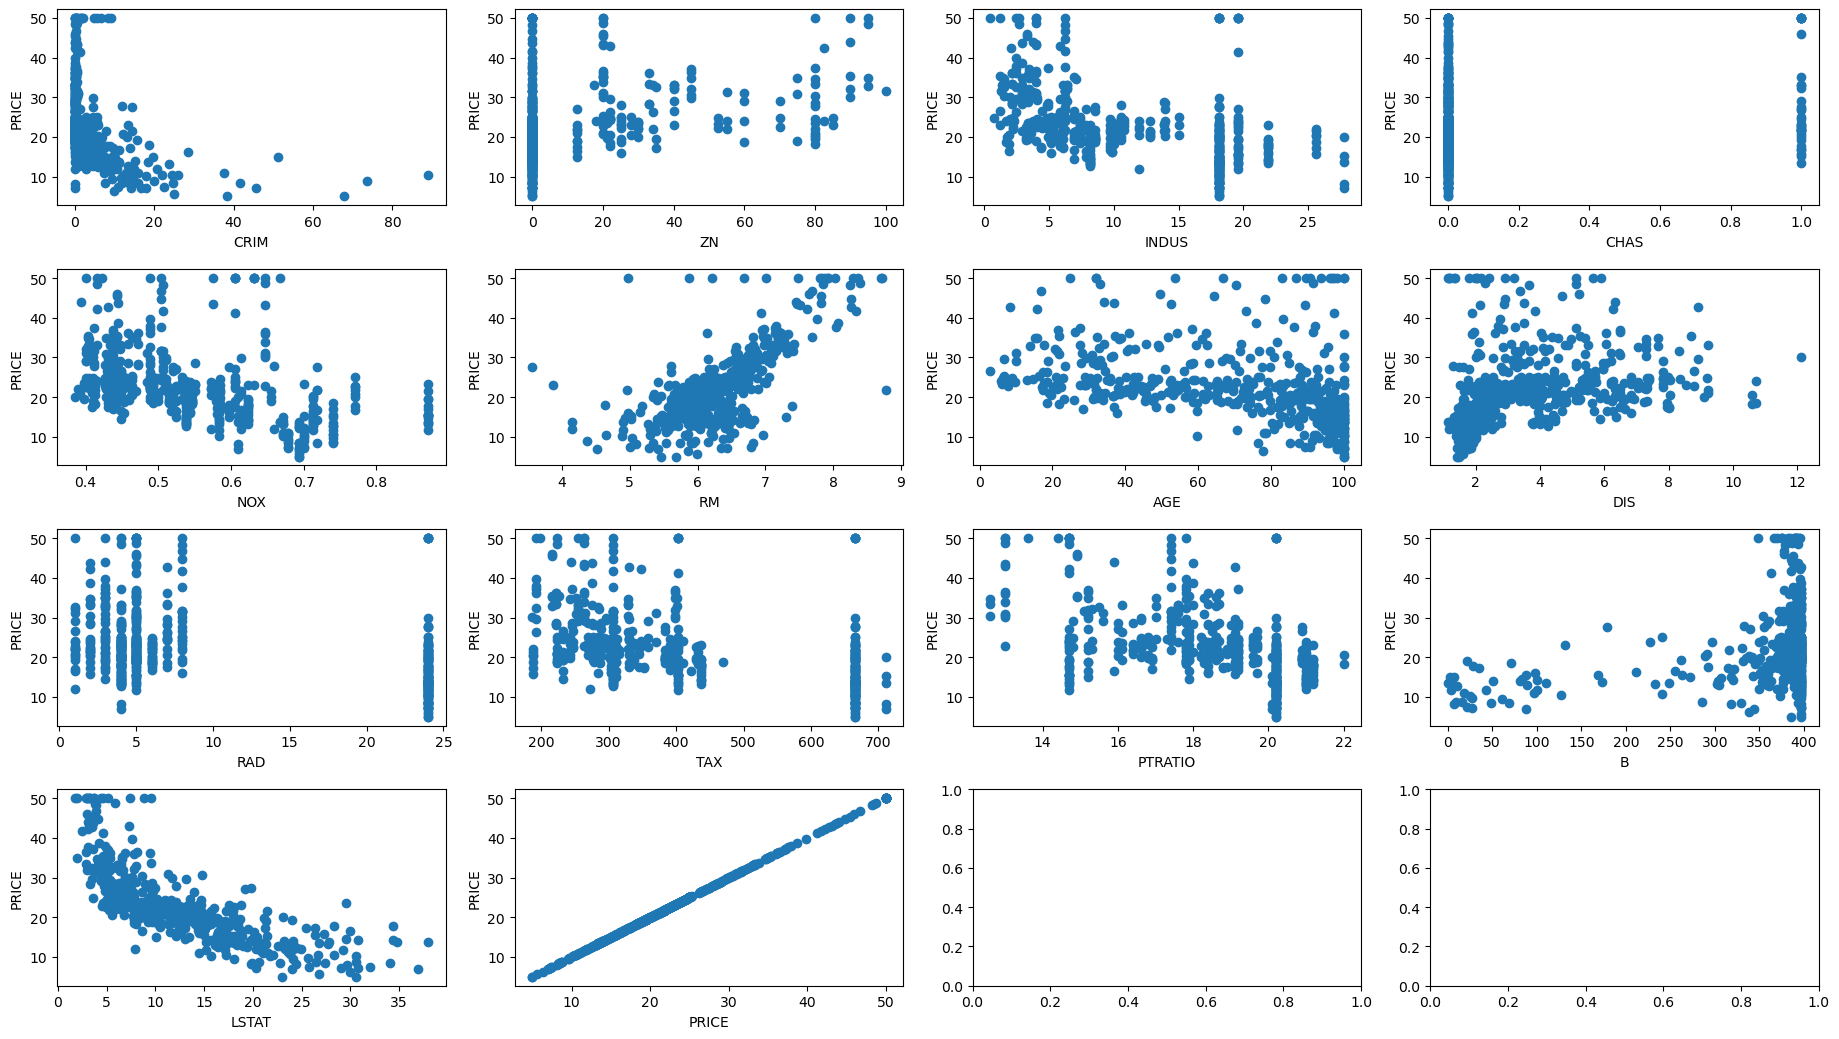

In [22]:
# Visualizza la correlazione fra numero di stanze e prezzo
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4)
fig.set_size_inches(18.5, 10.5)

for ax, feature in zip(fig.axes, df_boston[:0]):
  ax.scatter(df_boston[feature], df_boston.PRICE)
  ax.set_xlabel(feature)
  ax.set_ylabel('PRICE')

fig.tight_layout()

In [23]:
correlation = df_boston['RM'].corr(df_boston['PRICE'])
correlation

0.695359947071539

In [24]:
correlation_pers = df_boston['RM'].corr(df_boston['PRICE'],method='pearson')
correlation_pers

0.695359947071539

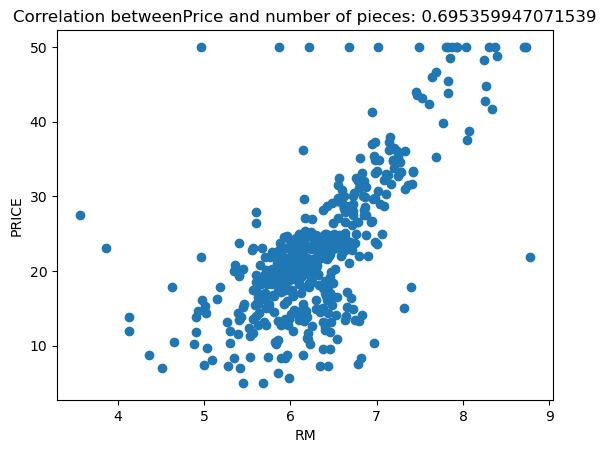

In [25]:
# Plot the correlation
plt.scatter(df_boston['RM'], df_boston['PRICE'])
plt.title('Correlation betweenPrice and number of pieces: {}'.format(correlation))
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()

In [26]:
import numpy as np

In [27]:
# Fit the regression line
fit = np.polyfit(df_boston['RM'], df_boston['PRICE'], deg=1)
regression_line = np.poly1d(fit)

In [28]:
import numpy as np
fit = np.polyfit(df_boston['RM'], df_boston['PRICE'], deg=1)
regression_line=np.poly1d(fit)

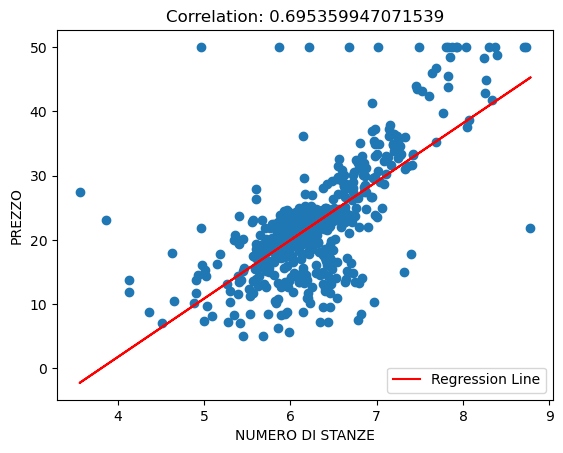

In [29]:

# Plot the scatter plot and regression line
plt.scatter(df_boston['RM'], df_boston['PRICE'])
plt.plot(df_boston['RM'], regression_line(df_boston['RM']), color='red', label='Regression Line')
plt.title('Correlation: {}'.format(correlation))
plt.xlabel('NUMERO DI STANZE')
plt.ylabel('PREZZO')
plt.legend()
plt.show()

# Visualizzazione della matrice di correlazione

In [30]:
import seaborn as sns

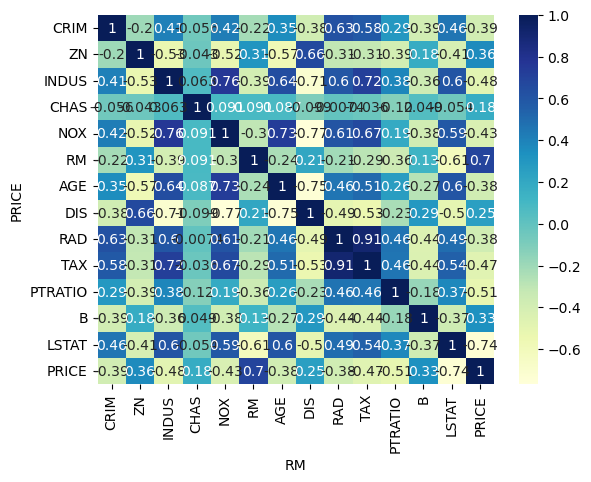

In [31]:
# Calcolare la matrice di correlazione
correlation_matrix = df_boston.corr()

# Creare una heatmap della matrice di correlazione
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

# Impostare le etichette degli assi
plt.xlabel('RM')
plt.ylabel('PRICE')

# Visualizzare il grafico
plt.show()

#### *Creazione di training e validation set*

---
Una volta analizzati i dati, possiamo proseguire suddividendoli in training-set e test-set. Questo ci permettera di allenare il nostro modello su un set di dati e poi testarlo su un set di dati alternativo, mai visto prima dal modello, in maniera da mitigare l'effetto di *overfitting*.

In [32]:
# X = variabili indipendenti (features)
X = df_boston.drop('PRICE', axis=1)

# y = variabile target
y = df_boston.PRICE

# Dividiamo i dati
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### *Selezione dell'algoritmo*

---
Una volta divisi i dati possiamo andare ad importare il nostro modello e a configurarlo. Il modello necessario per la regressione lineare è `sklearn.liner_model.LinearRegression`. Per quanto riguarda la configurazione del modello invece, in questo caso non sarà necessario configurare alcun hyperparametro.

In [33]:
# Importiamo il modello
from sklearn.linear_model import LinearRegression

# Configuriamo il modello
lm = LinearRegression()

#### *Training del modello*

---
Come per ogni modello di scikit-learn la fase di addestramento avviene semplicemente invocando il metodo `fit` del modello. In questo caso dovremo passare al metodo sia la matrice di dati $X_{train}$ che i valori target corrispondenti $y_{train}$


In [34]:
# Alleniamo il modello
lm.fit(X_train, y_train)

LinearRegression()

#### *Analisi dei risultati*

---

Una volta allenato il modello, passiamo ad analizzare i risultati ottenuti. Nel caso della regressione, un ottimo punto di partenza è l'analisi dei coefficienti stimati dal modello. Questi ci indicano il tipo di relazione che intercorre tra una specifica variabile di input (feature) e la variabile di output.

I coefficienti sono **parametri** del modello appresi durante la fase di training e sono accessibili tramite l'attributo `coef_`

In [35]:
# Creaiamo un DataFrame con le features e i coefficiente di correlazione
corr = pd.DataFrame()
corr['features'] = X.columns
corr['estimatedCoefficient'] = lm.coef_
corr

,features,estimatedCoefficient
0,CRIM,-0.109862
1,ZN,0.041583
2,INDUS,0.054401
3,CHAS,3.083558
4,NOX,-13.267960
5,RM,3.843957
6,AGE,0.002441
7,DIS,-1.318827
8,RAD,0.289615
9,TAX,-0.013066


Possiamo poi passare ad analizzare le predizioni del modello. In questo caso dovremo utilizzare il test set che avevamo messo da parte in precedenza. Per ottenere le stime del modello utilizzeremo il metodo `predict`

In [36]:
# prediction
y_pred = lm.predict(X_test)

In [37]:
X_test.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
77,0.08707,0.0,12.83,0,0.437,6.140,45.8,4.0905,5,398,18.7,386.96,10.27
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03
60,0.14932,25.0,5.13,0,0.453,5.741,66.2,7.2254,8,284,19.7,395.11,13.15
432,6.44405,0.0,18.10,0,0.584,6.425,74.8,2.2004,24,666,20.2,97.95,12.03
268,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264,13.0,390.30,3.16


In [38]:
print(y_pred[0])

23.288003038238816


In [39]:
print(y_pred[:3])

[23.28800304 31.79486833 17.96392645]


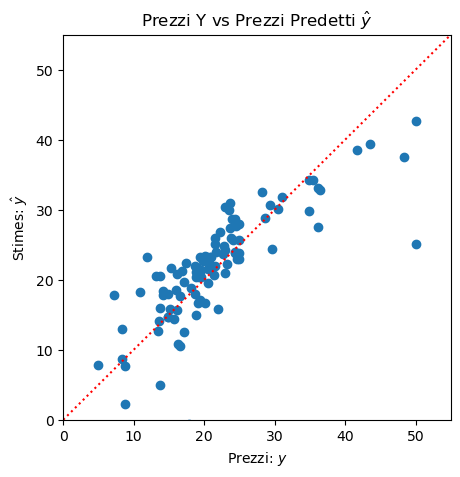

In [48]:
# Visualizziamo i prezzi reali $y$ rispetto a quelli predetti $\hat{y}$

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Prezzi: $y$")
plt.xlim(0, 55)
plt.ylabel("Stimes: $\hat{y}$")
plt.ylim(0, 55)
plt.title("Prezzi Y vs Prezzi Predetti $\hat{y}$")
plt.plot([0, 60], [0, 60], 'r:')
plt.show()

## Ci servono davvero tutte le features?

A questo punto potremmo chiederci se tutte le features sono davvero necessarie. Dagli scatter plot effettuati all'inizio dell'analisi abbiamo visto come solamente il numero medio di stanze sembrasse avere una chiara relazione lineare con il prezzo. Potremmo quindi pensare ad un modello lineare semplice basato solamente sulla variabile `RM`

In [41]:
# Alleniamo un modello solo sulla variabile RM

X_train_rm = X_train['RM'].to_numpy().reshape(-1, 1)
X_test_rm = X_test['RM'].to_numpy().reshape(-1, 1)

lm.fit(X_train_rm, y_train)
y_pred_rm = lm.predict(X_test_rm)

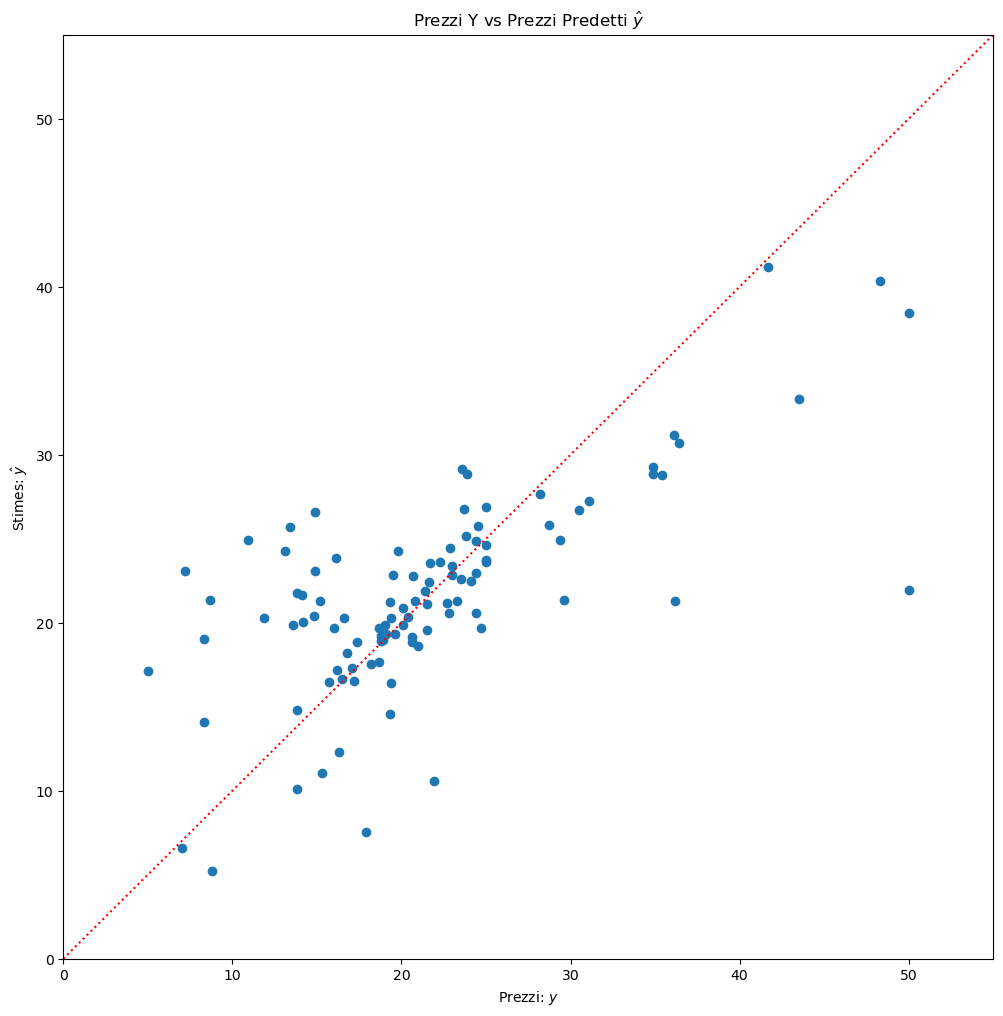

In [42]:

# Visualizzuamo i prezzi reali $y$ rispetto a quelli predetti $\hat{y}$
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_pred_rm)
plt.xlabel("Prezzi: $y$")
plt.xlim(0, 55)
plt.ylabel("Stimes: $\hat{y}$")
plt.ylim(0, 55)
plt.title("Prezzi Y vs Prezzi Predetti $\hat{y}$")
plt.plot([0, 60], [0, 60], 'r:')
plt.show()

Anche in questo caso le predizioni sembrano essere abbastanza corrette. Per confrontare la bontà dei due modelli però, dobbiamo basarci su misure oggettive.

Una delle misure più utilizzate nelle task di regressione è lo scarto quadratico medio:

$$
MSE = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y_i})^2
$$

</br>

https://it.wikipedia.org/wiki/Errore_quadratico_medio


Questa metrica si può trovare all'interno della libreria sklearn come `sklearn.metrics.mean_squared_error`

In [43]:
from sklearn.metrics import mean_squared_error

mse_all = mean_squared_error(y_test, y_pred)
mse_rm = mean_squared_error(y_test, y_pred_rm)
print(mse_all, mse_rm)


27.340201407716712 38.66603234852312


In [44]:
 #vedi meglio
r2_score=(y_test, y_pred)
print(r2_score)

(77     20.8
193    31.1
60     18.7
432    16.1
268    43.5
       ... 
313    21.6
150    21.5
366    21.9
405     5.0
358    22.7
Name: PRICE, Length: 102, dtype: float64, array([23.28800304, 31.79486833, 17.96392645, 20.86049226, 39.40611283,
       22.99229539, 21.0791681 , -0.62039838, 30.42677938, 17.68832293,
        2.21869861, 23.99526044, 26.8207412 , 14.9339829 , 23.82733689,
       25.9479152 , 32.8685445 , 22.97558393, 12.92171775, 24.30785963,
       24.41184587, 23.90205856, 12.60277491, 20.47996889, 28.75339771,
       23.29402463, 19.73463491, 30.11390348, 17.04016556, 42.70295236,
       20.71210243, 34.24469021, 14.42152363, 20.52284989, 17.80437934,
       28.61091776, 23.19700178, 14.12675817, 18.33303079, 37.51860207,
        4.93571522, 18.4705697 , 16.77255056, 20.42835093, 30.9093548 ,
       33.09471056, -6.24787055, 22.44172371, 27.37479123, 18.27064459,
       23.31645348, 25.10463525, 22.42908095, 27.6047168 , 32.47062603,
       21.69438879, 19.53003135, 

## Nozione di statistica sul MSE

Il mean squared error (MSE) o "errore quadrato medio" è una metrica comunemente usata nella valutazione dei modelli di machine learning, in particolare nei problemi di regressione.

Il MSE misura la discrepanza quadratica media tra i valori previsti dal modello e i valori effettivi del target. Viene calcolato come la media della differenza al quadrato tra i valori previsti e i valori effettivi.

Viene utilizzato alla fine di un modello di machine learning per valutarne le prestazioni. La ragione principale è che l'MSE dà importanza ai grandi errori, poiché il termine al quadrato amplifica queste discrepanze. Ciò significa che un errore più grande avrà un impatto maggiore sull'MSE rispetto a un errore più piccolo, rendendo l'MSE sensibile agli outlier o a grandi errori.

Utilizzare l'MSE alla fine di un modello di machine learning consente di ottenere una stima dell'accuratezza del modello nella previsione dei valori del target. Un MSE basso indica che il modello ha prestazioni migliori, poiché la discrepanza tra i valori previsti e quelli effettivi è più piccola. D'altra parte, un MSE elevato indica una maggiore distanza tra i valori previsti e quelli effettivi, indicando una minore accuratezza del modello.

Spesso, durante la fase di addestramento, l'MSE viene utilizzato come funzione di costo da minimizzare per ottimizzare i parametri del modello e trovare la migliore combinazione di parametri che riduce l'errore quadratico medio.